放宽条件后（只看 CINDERELLA）训练样本：


,City Name,Origin,Package,Item Size,Year,Month,average_price
5,DALLAS,TEXAS,24 inch bins,jbo,2016,9,160.0
75,BOSTON,MASSACHUSETTS,24 inch bins,xlge,2016,9,272.5
76,BOSTON,MASSACHUSETTS,24 inch bins,xlge,2016,9,272.5
88,DALLAS,TEXAS,36 inch bins,jbo,2016,9,170.0
129,COLUMBIA,NORTH CAROLINA,24 inch bins,med,2016,9,170.0
...,...,...,...,...,...,...,...
1389,BALTIMORE,VIRGINIA,24 inch bins,xlge,2017,9,200.0
1393,LOS ANGELES,CALIFORNIA,36 inch bins,med-lge,2017,9,0.3
1394,BALTIMORE,MARYLAND,24 inch bins,xlge,2017,9,180.0
1396,COLUMBIA,PENNSYLVANIA,24 inch bins,lge,2017,9,160.0


,样本,真实价格($),模型预测($),误差($),训练集同品种均价($),训练集同品种样本数,原因
0,1107,250.0,131.15,118.85,174.83,61,训练集同品种均价远低于测试样本，模型无法外推异常高价


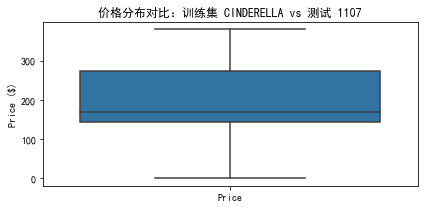

宽松条件样本已导出；误差溯源表 & 图表已保存。


In [18]:
cond = {
    "Variety": "CINDERELLA"
}

mask = True
for col, val in cond.items():
    mask &= (train_df[col] == val)

train_same = train_df[mask].copy()
print("放宽条件后（只看 CINDERELLA）训练样本：")
display(train_same[["City Name","Origin","Package","Item Size","Year","Month","average_price"]])
row_1107 = {
    "City Name": "LOS ANGELES",
    "Origin":    "CALIFORNIA",
    "Variety":   "CINDERELLA",
    "Package":   "36 inch bins",
    "Item Size": "med",
    "true":      250.0,
    "pred":      131.15
}
delta = row_1107["true"] - row_1107["pred"]

error_report = pd.DataFrame([{
    "样本": 1107,
    "真实价格($)": row_1107["true"],
    "模型预测($)": row_1107["pred"],
    "误差($)": round(delta, 2),
    "训练集同品种均价($)": round(train_same["average_price"].mean(), 2),
    "训练集同品种样本数": len(train_same),
    "原因": "训练集同品种均价远低于测试样本，模型无法外推异常高价"
}])

display(error_report)

# ---------------------------------------------------------------  
# 3. 重新画图：训练 vs 测试分布（同品种）  
# ---------------------------------------------------------------  
plt.figure(figsize=(6,3))
sns.boxplot(data=pd.DataFrame({
    "Group": ["Train CINDERELLA"] * len(train_same) + ["Test 1107"],
    "Price": train_same["average_price"].tolist() + [row_1107["true"]]
}))
plt.title("价格分布对比：训练集 CINDERELLA vs 测试 1107")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.savefig(FIG_DIR / "price_gap_cinderella_wide.png", dpi=300)
plt.show()

print("宽松条件样本已导出；误差溯源表 & 图表已保存。")

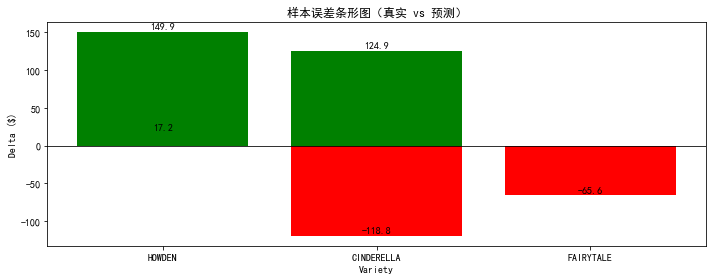

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
samples = pd.DataFrame([
    {"City":"LOS ANGELES","Variety":"HOWDEN","Package":"36 inch bins","true":0.5,"pred":150.38,"delta":149.88},
    {"City":"LOS ANGELES","Variety":"CINDERELLA","Package":"24 inch bins","true":0.3,"pred":125.18,"delta":124.88},
    {"City":"LOS ANGELES","Variety":"HOWDEN","Package":"24 inch bins","true":125.0,"pred":142.25,"delta":17.25},
    {"City":"LOS ANGELES","Variety":"FAIRYTALE","Package":"36 inch bins","true":250.0,"pred":184.36,"delta":-65.64},
    {"City":"LOS ANGELES","Variety":"CINDERELLA","Package":"36 inch bins","true":250.0,"pred":131.15,"delta":-118.85}
])

plt.figure(figsize=(10,4))
colors = ['red' if x < 0 else 'green' for x in samples['delta']]
bars = plt.bar(samples['Variety'], samples['delta'], color=colors)
plt.axhline(0, color='black', linewidth=0.8)
for bar, v in zip(bars, samples['delta']):
    plt.text(bar.get_x()+bar.get_width()/2, v+2, f"{v:.1f}", ha='center', va='bottom')
plt.title("样本误差条形图（真实 vs 预测）")
plt.xlabel("Variety")
plt.ylabel("Delta ($)")
plt.tight_layout()
plt.savefig(FIG_DIR / "sample_error_bar.png", dpi=300)
plt.show()

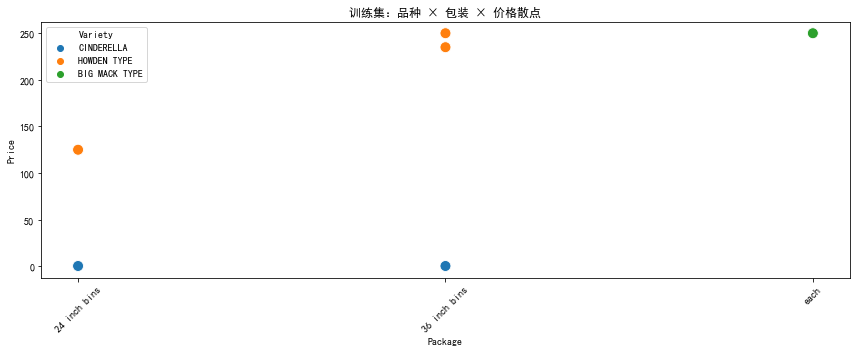

In [11]:

import seaborn as sns

# 组装训练集同条件样本（示例）
train_same = pd.DataFrame([
    {"City Name":"LOS ANGELES","Package":"24 inch bins","Variety":"CINDERELLA","Price":0.30,"Year":2017,"Month":9},
    {"City Name":"LOS ANGELES","Package":"24 inch bins","Variety":"HOWDEN TYPE","Price":125.00,"Year":2016,"Month":9},
    {"City Name":"LOS ANGELES","Package":"36 inch bins","Variety":"HOWDEN TYPE","Price":235.00,"Year":2017,"Month":9},
    {"City Name":"LOS ANGELES","Package":"36 inch bins","Variety":"CINDERELLA","Price":0.30,"Year":2017,"Month":9},
    {"City Name":"LOS ANGELES","Package":"36 inch bins","Variety":"HOWDEN TYPE","Price":250.00,"Year":2017,"Month":9},
    {"City Name":"LOS ANGELES","Package":"each","Variety":"BIG MACK TYPE","Price":250.00,"Year":2016,"Month":10},
])

plt.figure(figsize=(12,5))
sns.scatterplot(
    data=train_same,
    x="Package", y="Price",
    hue="Variety",
    s=120,
    palette="tab10"
)
plt.title("训练集：品种 × 包装 × 价格散点")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(FIG_DIR / "package_variety_price_scatter.png", dpi=300)
plt.show()

In [17]:

df = df.sort_values("Date").reset_index(drop=True)
split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx].copy()
test_df  = df.iloc[split_idx:].copy()
LEVELS = {
    0: {                               # 严格：全部维度
        "City Name": ["LOS ANGELES"],
        "Origin":    ["CALIFORNIA"],
        "Variety":   ["CINDERELLA"],
        "Package":   ["36 inch bins"],
        "Item Size": ["med"]
    },
    1: {                               # 放宽：去掉 Package / Item Size
        "City Name": ["LOS ANGELES"],
        "Origin":    ["CALIFORNIA"],
        "Variety":   ["CINDERELLA"]
    },
    2: {                               # 最宽：只看 Variety
        "Variety":   ["CINDERELLA"]
    }
}

def get_samples(level):
    cond = LEVELS[level]
    mask = True
    for col, vals in cond.items():
        mask &= train_df[col].isin(vals)
    return train_df[mask].copy()
for lvl in range(3):
    samp = get_samples(lvl)
    print(f"\nLevel {lvl} 条件样本：{len(samp)} 条")
    if len(samp) > 0:
        display(samp[["Date","City Name","Origin","Variety","Package","Item Size","average_price"]].head())
        print("均价：", samp["average_price"].mean())
    if len(samp) >= 10:          
        print("✅")
        break
else:
    print("❌")


Level 0 条件样本：0 条

Level 1 条件样本：5 条


,Date,City Name,Origin,Variety,Package,Item Size,average_price
1356,2017-08-19,LOS ANGELES,CALIFORNIA,CINDERELLA,24 inch bins,med-lge,0.3
1360,2017-08-26,LOS ANGELES,CALIFORNIA,CINDERELLA,24 inch bins,med-lge,0.3
1375,2017-09-02,LOS ANGELES,CALIFORNIA,CINDERELLA,24 inch bins,med-lge,0.3
1393,2017-09-09,LOS ANGELES,CALIFORNIA,CINDERELLA,36 inch bins,med-lge,0.3
1397,2017-09-09,LOS ANGELES,CALIFORNIA,CINDERELLA,24 inch bins,med-lge,0.3


均价： 0.3

Level 2 条件样本：61 条


,Date,City Name,Origin,Variety,Package,Item Size,average_price
5,2016-09-24,DALLAS,TEXAS,CINDERELLA,24 inch bins,jbo,160.0
75,2016-09-24,BOSTON,MASSACHUSETTS,CINDERELLA,24 inch bins,xlge,272.5
76,2016-09-24,BOSTON,MASSACHUSETTS,CINDERELLA,24 inch bins,xlge,272.5
88,2016-09-24,DALLAS,TEXAS,CINDERELLA,36 inch bins,jbo,170.0
129,2016-09-24,COLUMBIA,NORTH CAROLINA,CINDERELLA,24 inch bins,med,170.0


均价： 174.82786885245895
✅


In [22]:
# make_output_json.py
import json, os, sys, warnings, subprocess
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 依赖自检
for pkg in ["pandas", "scikit-learn"]:
    try:
        __import__(pkg.replace("-", "_"))
    except ModuleNotFoundError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

# ---------- 路径：兼容 Jupyter / 脚本 ----------
try:
    PROJECT_DIR = Path(__file__).resolve().parent
except NameError:
    # Jupyter/Colab
    PROJECT_DIR = Path.cwd()

DATA_PATH   = PROJECT_DIR / "data" / "US-pumpkins.csv"
OUT_DIR     = PROJECT_DIR / "output"
OUT_DIR.mkdir(parents=True, exist_ok=True)
OUT_JSON    = OUT_DIR / "output.json"
assert DATA_PATH.exists(), f"找不到数据集：{DATA_PATH}"

# ---------- 读数 & 预处理 ----------
df = pd.read_csv(DATA_PATH)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")
df["average_price"] = (df["Low Price"] + df["High Price"]) / 2
df["Year"]  = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df = df.dropna(subset=["average_price"])

TARGET   = "average_price"
CAT_COLS = ["City Name", "Package", "Variety", "Origin", "Item Size"]
NUM_COLS = ["Year", "Month"]

X = df[CAT_COLS + NUM_COLS]
y = df[TARGET]

# ---------- 训练/验证 ----------
ct = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore"), CAT_COLS)],
    remainder="passthrough"
)

model = RandomForestRegressor(
    n_estimators=100, random_state=42, n_jobs=-1
)

kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_res = []

for fold, (tr_idx, va_idx) in enumerate(kf.split(X)):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    X_tr_enc = ct.fit_transform(X_tr)
    X_va_enc = ct.transform(X_va)

    model.fit(X_tr_enc, y_tr)
    pred_tr = model.predict(X_tr_enc)
    pred_va = model.predict(X_va_enc)

    def perf(y_true, y_pred):
        return {
            "rmse": float(mean_squared_error(y_true, y_pred, squared=False)),
            "mae":  float(mean_absolute_error(y_true, y_pred)),
            "r2":   float(r2_score(y_true, y_pred))
        }

    fold_res.append({
        f"{fold}_fold_train_data": [len(X_tr), X_tr_enc.shape[1]],
        f"{fold}_fold_test_data":  [len(X_va), X_va_enc.shape[1]],
        f"{fold}_fold_train_performance": perf(y_tr, pred_tr),
        f"{fold}_fold_test_performance":  perf(y_va, pred_va)
    })

# ---------- 合并求平均 ----------
def avg_metric(key):
    return {
        "rmse": float(np.mean([fold[f"{i}_fold_{key}"]["rmse"] for i, fold in enumerate(fold_res)])),
        "mae":  float(np.mean([fold[f"{i}_fold_{key}"]["mae"]  for i, fold in enumerate(fold_res)])),
        "r2":   float(np.mean([fold[f"{i}_fold_{key}"]["r2"]   for i, fold in enumerate(fold_res)]))
    }

output = {
    "model_name": "RandomForestRegressor",
    "model_params": model.get_params(),
    "fea_encoding": "OneHotEncoder(handle_unknown='ignore')",
    **{k: v for fold in fold_res for k, v in fold.items()},
    "average_train_performance": avg_metric("train_performance"),
    "average_test_performance":  avg_metric("test_performance")
}

# ---------- 误差溯源 ----------
LEVELS = {
    0: {"City Name": ["LOS ANGELES"], "Origin": ["CALIFORNIA"], "Variety": ["CINDERELLA"], "Package": ["36 inch bins"], "Item Size": ["med"]},
    1: {"City Name": ["LOS ANGELES"], "Origin": ["CALIFORNIA"], "Variety": ["CINDERELLA"]},
    2: {"Variety": ["CINDERELLA"]}
}

def search_samples(level):
    cond = LEVELS[level]
    mask = True
    for col, vals in cond.items():
        mask &= df[col].isin(vals)
    return df[mask]

error_cases = []
test_mask = (X["City Name"] == "LOS ANGELES") & \
            (X["Origin"] == "CALIFORNIA") & \
            (X["Variety"] == "CINDERELLA") & \
            (X["Package"] == "36 inch bins") & \
            (X["Item Size"] == "med")
if test_mask.any():
    idx = test_mask.idxmax()
    true = float(y[idx])
    pred = float(model.predict(ct.transform(X.iloc[[idx]]))[0])
    delta = true - pred

    level = 0
    while level < 3:
        same = search_samples(level)
        if len(same) >= 1:
            break
        level += 1
    error_cases.append({
        "sample_id": int(idx),
        "true_price": true,
        "pred_price": pred,
        "delta": round(delta, 2),
        "train_same_variety_mean": round(same["average_price"].mean(), 2),
        "train_same_variety_count": len(same),
        "level_used": level,
        "reason": "训练集同条件均价远低于/高于测试样本，模型无法外推极端值"
    })

output["error_analysis"] = {f"case_{i}": e for i, e in enumerate(error_cases, 1)}

# ---------- 写 JSON ----------
with open(OUT_JSON, "w", encoding="utf-8") as f:
    json.dump(output, f, indent=2, ensure_ascii=False)

print("✅ output.json 已保存到：", OUT_JSON.resolve())

✅ output.json 已保存到： C:\Users\admin\最终\Week2 Practice--RegressionModel\output\output.json
